In [115]:

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import datetime as dt


In [116]:
## Loading data 

df = pd.read_excel(r"C:\Users\shubh\Desktop\IIM Project\ride_dataset.xlsx")

In [117]:
print(df.shape)

(4943, 25)


In [118]:
## display basic info 

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id_new           4943 non-null   int64         
 1   order_try_id_new       4943 non-null   int64         
 2   calc_created           4943 non-null   datetime64[ns]
 3   metered_price          4923 non-null   float64       
 4   upfront_price          3409 non-null   float64       
 5   distance               4943 non-null   int64         
 6   duration               4943 non-null   int64         
 7   gps_confidence         4943 non-null   int64         
 8   entered_by             4943 non-null   object        
 9   b_state                4943 non-null   object        
 10  dest_change_number     4943 non-null   int64         
 11  prediction_price_type  4923 non-null   object        
 12  predicted_distance     4923 non-null   float64       
 13  pre

In [119]:
## printing first few rows

print(df.head())

   order_id_new  order_try_id_new        calc_created  metered_price  \
0            22                22 2020-02-02 03:37:31           4.04   
1           618               618 2020-02-08 02:26:19           6.09   
2           657               657 2020-02-08 11:50:35           4.32   
3           313               313 2020-02-05 06:34:54       72871.72   
4          1176              1176 2020-02-13 17:31:24       20032.50   

   upfront_price  distance  duration  gps_confidence entered_by   b_state  \
0           10.0      2839       700               1     client  finished   
1            3.6      5698       493               1     client  finished   
2            3.5      4426       695               1     client  finished   
3            NaN     49748      1400               0     client  finished   
4        19500.0     10273      5067               1     client  finished   

   ...  ticket_id_new rider_app_version  order_state  order_try_state  \
0  ...           1376          

In [120]:
## Checking for null values

null_values = df.isnull().sum()
print("Null Values in Each Column:")
print(null_values)


Null Values in Each Column:
order_id_new                0
order_try_id_new            0
calc_created                0
metered_price              20
upfront_price            1534
distance                    0
duration                    0
gps_confidence              0
entered_by                  0
b_state                     0
dest_change_number          0
prediction_price_type      20
predicted_distance         20
predicted_duration         20
change_reason_pricing    4645
ticket_id_new               0
rider_app_version          16
order_state                 0
order_try_state             0
driver_app_version          0
driver_device_uid_new       0
device_name                 0
us_indicator                0
overpaid_ride_ticket        0
fraud_score              2759
dtype: int64


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id_new           4943 non-null   int64         
 1   order_try_id_new       4943 non-null   int64         
 2   calc_created           4943 non-null   datetime64[ns]
 3   metered_price          4923 non-null   float64       
 4   upfront_price          3409 non-null   float64       
 5   distance               4943 non-null   int64         
 6   duration               4943 non-null   int64         
 7   gps_confidence         4943 non-null   int64         
 8   entered_by             4943 non-null   object        
 9   b_state                4943 non-null   object        
 10  dest_change_number     4943 non-null   int64         
 11  prediction_price_type  4923 non-null   object        
 12  predicted_distance     4923 non-null   float64       
 13  pre

In [122]:
## Dropping irrelevant column to our price prediction analysis

df = df.drop(columns=['rider_app_version', 'driver_app_version', 'driver_device_uid_new', 'us_indicator', 'device_name'])


In [123]:
# Drop rows where metered price is 0
df = df[df['metered_price'] != 0]

In [124]:
df = df.dropna(subset=['upfront_price'])

In [125]:
df.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,order_state,order_try_state,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,1376,finished,finished,0,-1383.0
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,2035,finished,finished,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,2222,finished,finished,0,-166.0
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,2710,finished,finished,0,NaN
5,1209,1209,2020-02-14 01:27:01,6.11,6.3,4924,513,1,client,finished,1,upfront,4882.0,562.0,NaN,2732,finished,finished,0,NaN


In [126]:
# Changing calc created column to datetime

df['calc_created'] = pd.to_datetime(df['calc_created'])

In [127]:
# seperating date and time from calc created column

df['calc_date'] = df['calc_created'].dt.date
df['calc_time'] = df['calc_created'].dt.time

In [128]:
# Displaying changes

print(df[['calc_created', 'calc_date', 'calc_time']].head())


         calc_created   calc_date calc_time
0 2020-02-02 03:37:31  2020-02-02  03:37:31
1 2020-02-08 02:26:19  2020-02-08  02:26:19
2 2020-02-08 11:50:35  2020-02-08  11:50:35
4 2020-02-13 17:31:24  2020-02-13  17:31:24
5 2020-02-14 01:27:01  2020-02-14  01:27:01


In [129]:
# Approach being partioning data into time blocks of 6 hours for better understanding of time and price relation

# Extracting hours from calc_time

df['hour'] = pd.to_datetime(df['calc_time'], format='%H:%M:%S').dt.hour

In [130]:
# Define time block conditions
conditions = [
    (df['hour'] >= 0) & (df['hour'] < 6),   # Block A: 00:00 - 06:00
    (df['hour'] >= 6) & (df['hour'] < 12),  # Block B: 06:00 - 12:00
    (df['hour'] >= 12) & (df['hour'] < 18), # Block C: 12:00 - 18:00
    (df['hour'] >= 18) & (df['hour'] < 24)  # Block D: 18:00 - 00:00
]
block_labels = ['A', 'B', 'C', 'D']

# Assign time blocks
df['time_block'] = pd.cut(df['hour'], bins=[-1, 6, 12, 18, 24], labels=block_labels, include_lowest=True)

print(df[['calc_time', 'hour', 'time_block']].head())

  calc_time  hour time_block
0  03:37:31     3          A
1  02:26:19     2          A
2  11:50:35    11          B
4  17:31:24    17          C
5  01:27:01     1          A


In [131]:
df.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,change_reason_pricing,ticket_id_new,order_state,order_try_state,overpaid_ride_ticket,fraud_score,calc_date,calc_time,hour,time_block
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,1376,finished,finished,0,-1383.0,2020-02-02,03:37:31,3,A
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,...,NaN,2035,finished,finished,0,NaN,2020-02-08,02:26:19,2,A
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,NaN,2222,finished,finished,0,-166.0,2020-02-08,11:50:35,11,B
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,2710,finished,finished,0,NaN,2020-02-13,17:31:24,17,C
5,1209,1209,2020-02-14 01:27:01,6.11,6.3,4924,513,1,client,finished,...,NaN,2732,finished,finished,0,NaN,2020-02-14,01:27:01,1,A


In [132]:
# Count rides in each time block

time_block_counts = df['time_block'].value_counts()
print(time_block_counts)

time_block
C    1062
B     888
D     777
A     682
Name: count, dtype: int64


In [133]:
# Calculate percentage difference between upfront and metered price
df['pct_diff'] = ((df['upfront_price'] - df['metered_price']) / df['metered_price']) * 100
time_block_avg_diff = df.groupby('time_block')['pct_diff'].mean().reset_index()
time_block_avg_diff.columns = ['time_block', 'avg_pct_diff']

print(time_block_avg_diff)


  time_block  avg_pct_diff
0          A      1.765571
1          B      3.010690
2          C      1.608562
3          D     14.737397


C:\Users\shubh\AppData\Local\Temp\ipykernel_8432\3721332698.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_block_avg_diff = df.groupby('time_block')['pct_diff'].mean().reset_index()


In [138]:
# Summary statistics to identify potential outliers in key numerical columns
summary_stats = df[['metered_price', 'upfront_price', 'distance', 'duration', 'fraud_score']].describe()
summary_stats

,metered_price,upfront_price,distance,duration,fraud_score
count,3409.000000,3409.000000,3409.000000,3409.000000,1970.000000
mean,4999.300109,4160.095747,8971.718979,1245.337342,-686.746701
std,14306.060449,17015.711912,9882.407374,1311.288049,1149.825669
min,2.000000,2.000000,0.000000,0.000000,-14225.000000
25%,4.460000,4.200000,3629.000000,537.000000,-834.000000
50%,7.370000,6.600000,6549.000000,895.000000,-280.000000
75%,2033.300000,4000.000000,11203.000000,1447.000000,-70.000000
max,194483.520000,595000.000000,171119.000000,18734.000000,49.000000


In [ ]:
# filtering rows with pct_diff more than 20

filtered_data = df[df['pct_diff'] > 20]

In [145]:
print(filtered_data.head())

    order_id_new  order_try_id_new        calc_created  metered_price  \
0             22                22 2020-02-02 03:37:31           4.04   
7           1662              1662 2020-02-17 18:24:45           2.61   
23          1477              1477 2020-02-15 19:41:47        6000.00   
28          1947              1947 2020-02-20 23:35:53           2.00   
47           251               251 2020-02-04 11:47:53        6000.00   

    upfront_price  distance  duration  gps_confidence entered_by   b_state  \
0            10.0      2839       700               1     client  finished   
7             6.5      2020       412               1     client  finished   
23        10000.0      2478       372               1     client  finished   
28           10.4        24        29               1     client  finished   
47        16000.0       743       345               1     client  finished   

    ...  ticket_id_new order_state  order_try_state  overpaid_ride_ticket  \
0   ...        

In [147]:
# Group by categorical variables and calculate average deviation
categorical_columns = ['order_state', 'prediction_price_type', 'change_reason_pricing']
for col in categorical_columns:
    group_avg = filtered_data.groupby(col)['pct_diff'].mean()
    print(f"\nAverage pct_diff by {col}:\n", group_avg)



Average pct_diff by order_state:
 order_state
finished    136.633558
Name: pct_diff, dtype: float64

Average pct_diff by prediction_price_type:
 prediction_price_type
upfront    136.633558
Name: pct_diff, dtype: float64

Average pct_diff by change_reason_pricing:
 change_reason_pricing
client_destination_changed    1286.996791
Name: pct_diff, dtype: float64


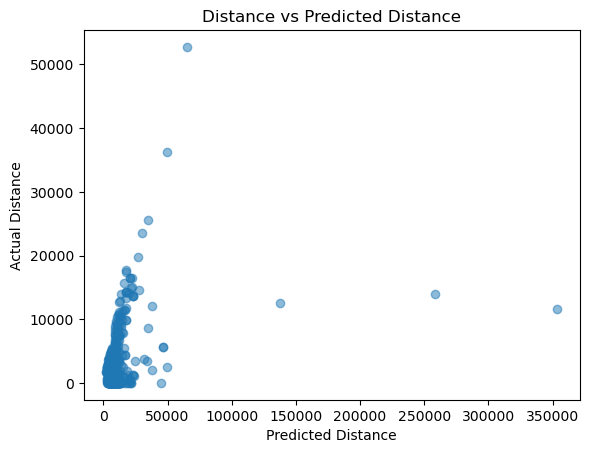

In [149]:

plt.scatter(filtered_data['predicted_distance'], filtered_data['distance'], alpha=0.5)
plt.title('Distance vs Predicted Distance')
plt.xlabel('Predicted Distance')
plt.ylabel('Actual Distance')
plt.show()


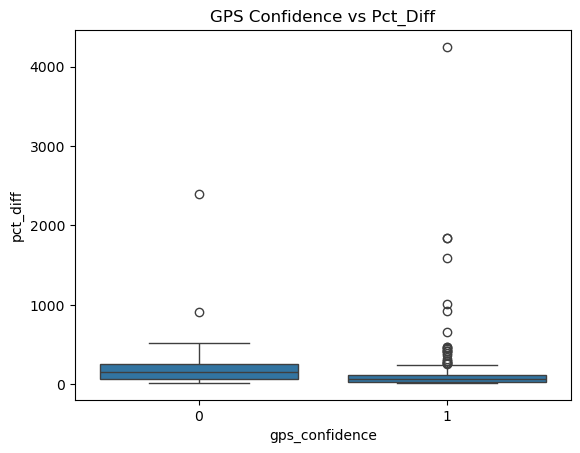

In [150]:
sns.boxplot(x='gps_confidence', y='pct_diff', data=filtered_data)
plt.title('GPS Confidence vs Pct_Diff')
plt.show()

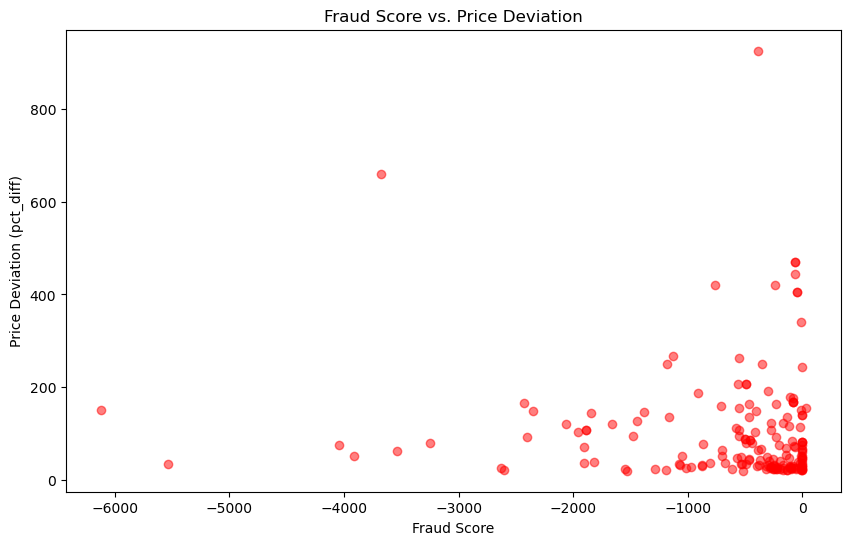

In [ ]:
# scatter plot for corelation btw price deviation and fraud score

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['fraud_score'], filtered_data['pct_diff'], alpha=0.5, color='red')
plt.title('Fraud Score vs. Price Deviation')
plt.xlabel('Fraud Score')
plt.ylabel('Price Deviation (pct_diff)')
plt.show()


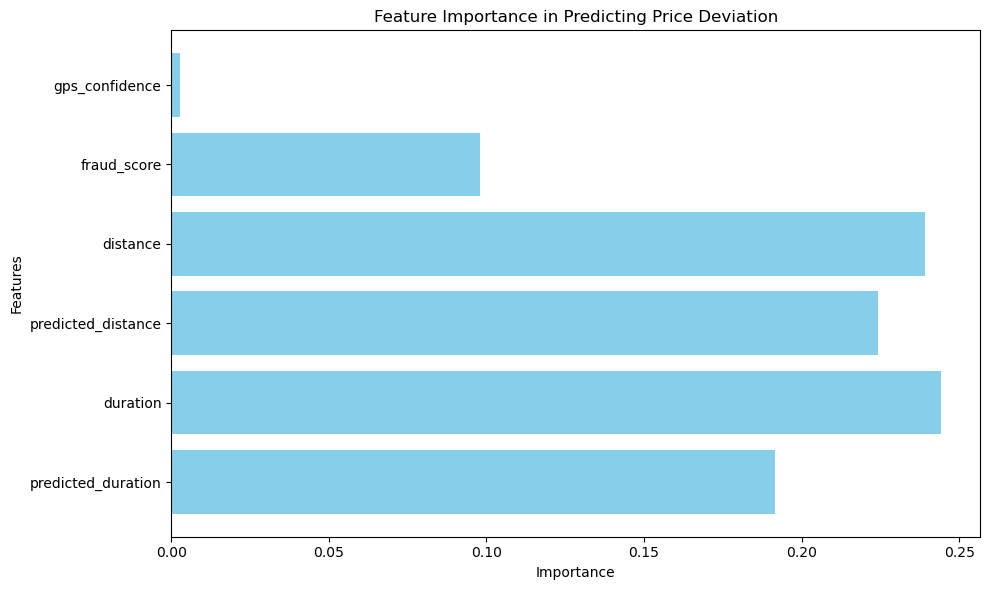

In [182]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, model.feature_importances_, color='skyblue')
plt.title('Feature Importance in Predicting Price Deviation')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Key Interpretation:
# - Higher importance indicates a stronger contribution to deviations.
# - Focus on improving the most influential features.
